## Stastical Learning-Linear Regression

**What is Linear Regression?**

Linear regression is a statistical method used to model the relationship between a dependent variable (Y) and one or more independent variables (X). 

It assumes that there is a linear relationship between the variables, which means that the change in Y is directly proportional to a change in X.



**Why Linear Regression?**

Ans: Linear regression is conceptually useful because it provides a framework for understanding how changes in X are related to changes in Y. Specifically, the coefficients in a linear regression equation can be interpreted as the amount by which Y is expected to change for a one-unit increase in X, holding all other variables constant. This makes it possible to investigate the effects of different predictors on the outcome variable and to test hypotheses about the strength and direction of these effects.

**What are the uses?**

Ans:Linear regression is practically useful because it is widely used and well understood in many fields, and because there are many software packages and tools available for fitting linear regression models and interpreting their results. Additionally, linear regression can be extended in various ways to accommodate more complex relationships between variables, such as polynomial, spline, or generalized linear models

**Problem Statement**

For example this notebook provides you the basic regression for the advertising data set.

1. Build a model which predicts sales based on the money spent on different platforms for marketing.

**Data** 

1. Use the advertising dataset taken from the kaggle and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

2. In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

This code imports several useful libraries for data analysis and visualization:

**pandas** :library for data manipulation and analysis. It provides a DataFrame object for storing and manipulating tabular data.

**numpy**:library for numerical computing. It provides powerful array operations and linear algebra tools.

**matplotlib**: library for creating visualizations. It provides a low-level interface for creating a wide range of plots and charts.

**seaborn** :library for data visualization built on top of matplotlib. It provides a higher-level interface for creating statistical graphics.

**%matplotlib**: inline is a magic command for Jupyter notebooks that enables inline plotting.

**warnings** is a built-in Python library for controlling warning messages. In this code, it is used to ignore warning messages.

In [1]:
# importing all the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

 I pulled the kaggle dataset data directly from Kaggle with my API tokens for our note book. For that we need to install the below commands.

In [2]:
!pip install eli5
!pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=43d5ce913374c294ba0bd05870960d1c1d5f8837c68752065d07605fbaf38f78
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"divyamyneni123","key":"2546107efd3aa943c0b742f6638a9937"}'}

Downloaded the data directly from the Kaggle.Check the below link for the reference to work on your dataset.

https://www.kaggle.com/general/74235

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# dowloading the data set from the kaggle and reading it
! kaggle datasets list -s advertising-dataset


ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
yasserh/advertising-sales-dataset                              Advertising Sales Dataset                             2KB  2021-12-25 13:56:21           3188         33  1.0              
ashydv/advertising-dataset                                     Advertising Dataset                                   2KB  2019-03-07 06:16:58          24760        103  0.4117647        
groffo/ads16-dataset                                           ADS-16 Computational Advertising Dataset              1GB  2017-01-14 18:12:43           4247        106  0.7058824        
tohuangjia/advertising-simple-dataset                          Ad

Searching my dataset from the above all the kaggle datasets for our notebook to perform linear regression

In [6]:
# searching for my dataset from the list below
! kaggle datasets download -d ashydv/advertising-dataset

  0% 0.00/1.83k [00:00<?, ?B/s]
100% 1.83k/1.83k [00:00<00:00, 769kB/s]


In [8]:
!unzip advertising-dataset.zip

Archive:  advertising-dataset.zip
  inflating: advertising.csv         


#Sales Prediction

Now we will perform the Linear regression in a step by step process.

 **1.Reading data**

**2. Data Inspection**

**3. Data cleaning**

**4. Data Analysis**

**5. Model Building**

**6. Model Evaluation** 

##Reading and Understanding the Data

In [10]:
advertising = pd.read_csv('advertising.csv')

In [11]:
advertising.shape
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


The data has been read and has been shaped accordingly and head method shows the first 5 rows of the data set.

##Data Inspection

In [12]:
advertising.shape

(200, 4)

This will display a summary of the dataframe's information, including the number of rows and columns, the column names and data types, and the number of non-null values in each column.



In [13]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


This will generate summary statistics for each numerical column in the dataframe, including the count, mean, standard deviation, minimum, and maximum values, as well as the quartiles.

In [14]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


###Data Cleaning

This code is checking for null values in the advertising dataframe and printing the percentage of null values for each column. The .isnull() method returns a Boolean dataframe with True values for null or missing values and False values otherwise. The .sum() method then calculates the total number of null values for each column, and multiplying by 100/advertising.shape[0] calculates the percentage of null values for each column.



In [15]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]


TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

From the above code we can see that there are no null values in the advertising dataset, as the percentage of null values for each column is 0. This means that the dataset is clean and does not require any further processing to handle missing values.

For suppose if you are having any null values or missing values:

We have three methods for imputing missing data.
Median
Dropping
Machine Learning Here the data with the NaN values will be checked and missing count for each column will be taken in a loop.

1.isna() is a method to check the not a number value

2.%missing will the missing values of the each columns out of 100.

####Sales (Target Variable)

**What are Outliers?**

Ans: Outliers are either very large or very small values, and can occur naturally or as a result of errors in data collection or data entry.

**Why do we need to check the outliers?**

Ans:Outliers can have a significant impact on statistical analysis as they can skew the distribution of the data and influence the results of summary statistics and predictive models. Therefore, it is important to identify and handle outliers appropriately, either by removing them from the dataset or by treating them as special cases in analysis or modeling

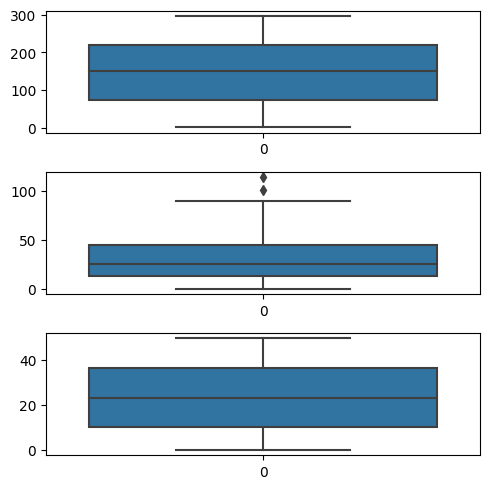

In [16]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

I have added an image to understand the outliers for the box plot for the reference.

The sns.boxplot() function is  used to create a box plot for TV, news, radio , with the data for each channel specified as the first argument and the corresponding subplot specified using the ax parameter.

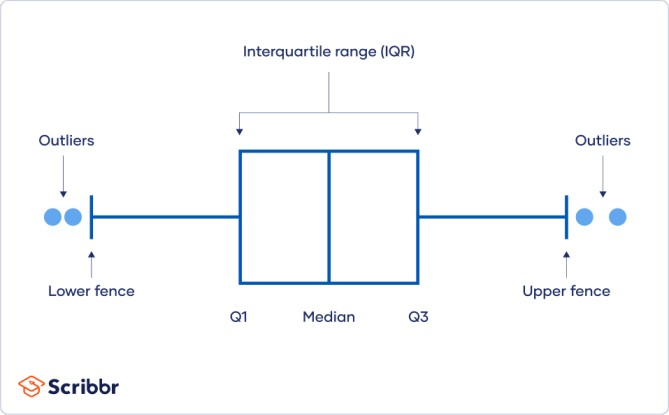

**There are no considerable outliers present in the data.** Check the above box plot for the reference.

##Exploratory Data Analysis

####Sales (Target Variable)

Consider the advertising data shown above. Questions we might ask:

**Is there a relationship between advertisements  and sales?**

**How strong is the relationship between advertisements and sales?**

**Which media contribute to sales?**

**How accurately can we predict future sales?**

**Is the relationship linear?**

**Is there synergy among the advertising media?**

**How well does the model fit the data?**

To get the box plot for the Sales

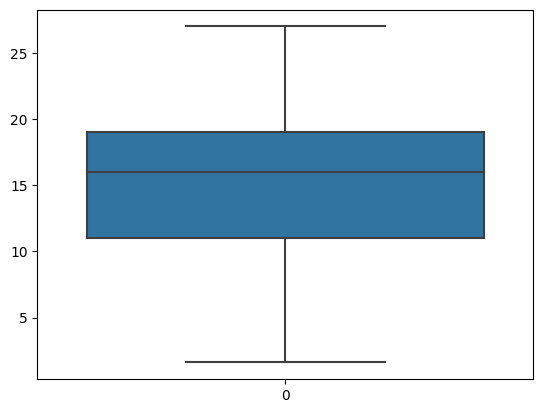

In [17]:
sns.boxplot(advertising['Sales'])
plt.show()

A pair plot is a useful way to visualize the relationships between multiple variables in a data set. Each pair of variables is plotted against each other on a scatter plot, and the diagonal shows a histogram or kernel density estimate for each individual variable.

In general, it can be helpful to carefully examine the scatter plots for any interesting patterns or relationships between variables

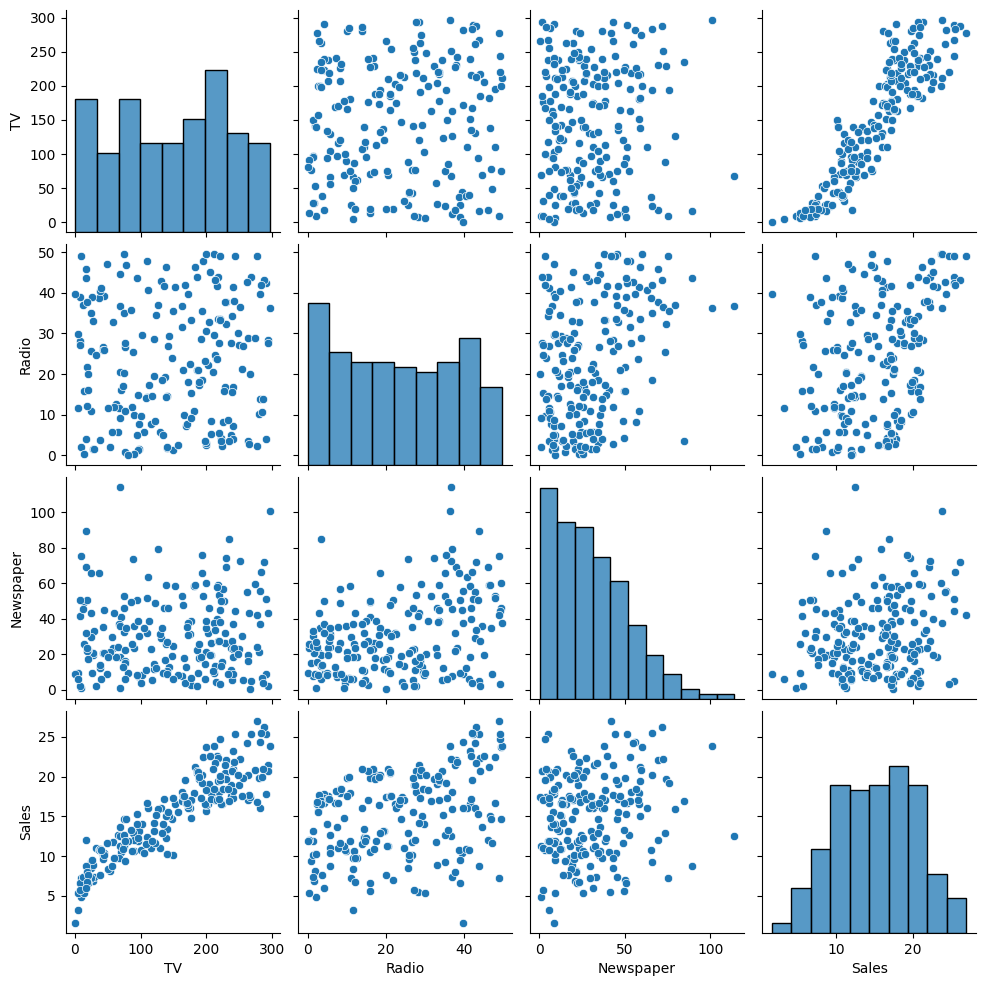

In [18]:
p = sns.pairplot(advertising)

### Let's see how Sales are related with other variables using scatter plot.

**How strong is the relationship between advertisements and sales?**

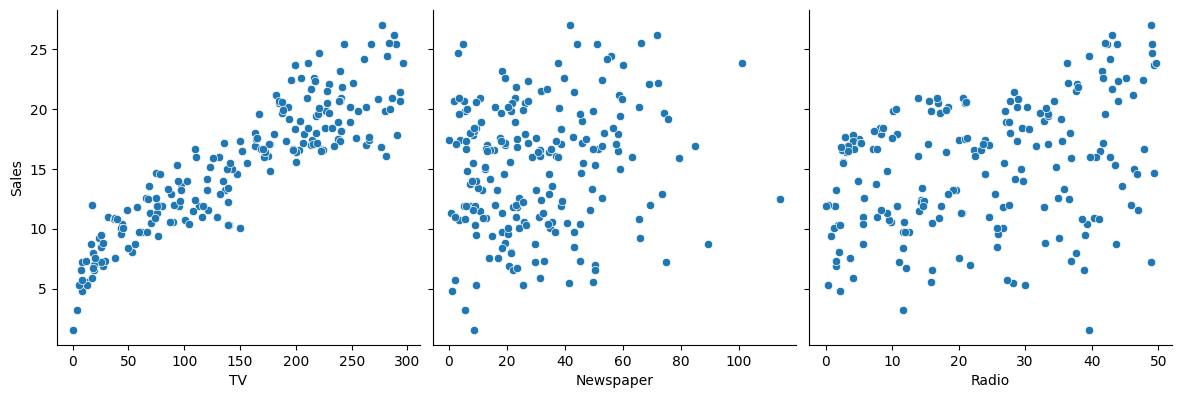

In [ ]:

sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

From the above scatter plot you can see how sales has an significant effect on the TV, Newspapers and Radio. We will dive deep into the relation from the heatmap and check which variables are having major correlation .

**Is there a relationship between advertising budget and sales?**

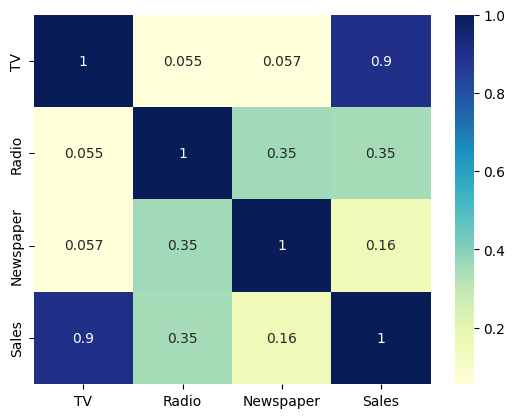

In [ ]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

**Which media contribute to sales?**

As is visible from the pairplot and the heatmap, that the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable for the further analysis.

##Model Building

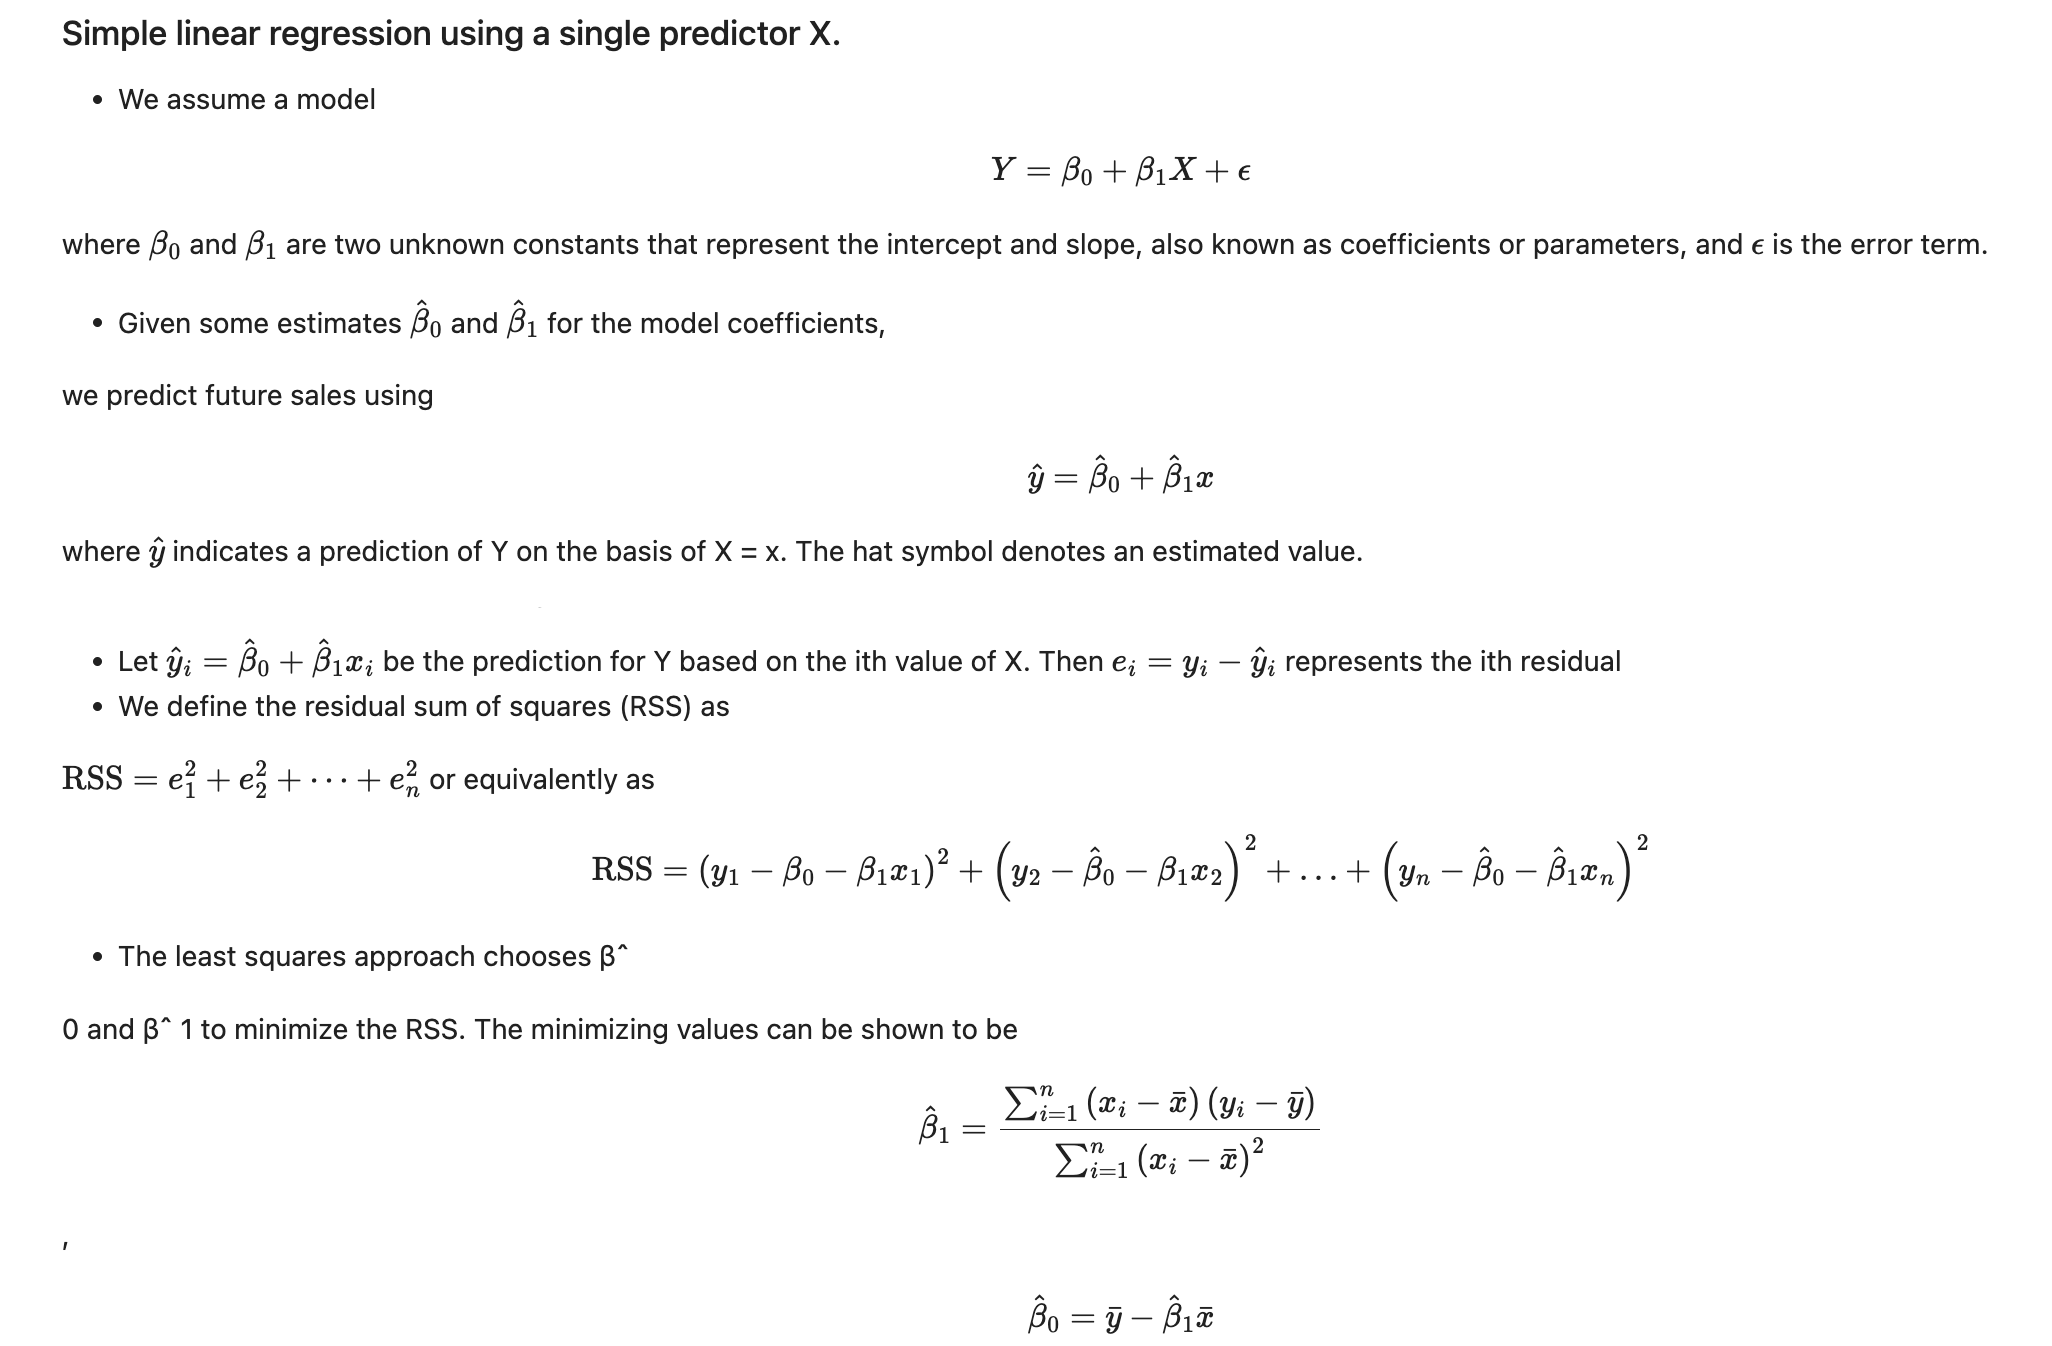

####Performing Simple Linear Regression
Equation of linear regression
y=c+m1x1+m2x2+...+mnxn
 
y
  = response

c
  = intercept

m1
  = coefficient for the first feature

mnth
  = coefficient for the nth feature

In our case:


**y=c+m1×TV**
 
The  m
  values are called the model **coefficients** or model **parameters**.

Generic Steps in model building using **statsmodels**

We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [ ]:
X = advertising['TV']
y = advertising['Sales']

**How to evaluate the performance of the model?**

ans:The train_test_split method is commonly used in machine learning for evaluating the performance of a model on a dataset. The purpose of using this method is to divide the available dataset into two parts: one for training the model and the other for testing its accuracy.

Simply,  train_test_split method is used to assess the performance of a machine learning model and to evaluate its generalization ability to new, unseen data.

**Train-Test Split**

You now need to split our variable into training and testing sets. 

You'll perform this by importing train_test_split from the sklearn.

model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [ ]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

**Details**

The X and y variables are the input features and target variable respectively. The train_size parameter is set to 0.7, which means that 70% of the data will be used for training the model(Generally this will be good if we take 70,30). The test_size parameter is set to 0.3, which means that 30% of the data will be used for testing the model. The random_state parameter is set to 100, which ensures that the same random split is obtained every time the code is run.

###Building a Linear Model

In [ ]:
import statsmodels.api as sm

You first need to import the statsmodel.api library using which you'll perform the linear regression.

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

Print the parameters, i.e. the intercept and the slope of the regression line fitted

In [ ]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

Performing a summary operation lists out all the different parameters of the regression line fitted

In [ ]:

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           1.52e-52
Time:                        14:41:46   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

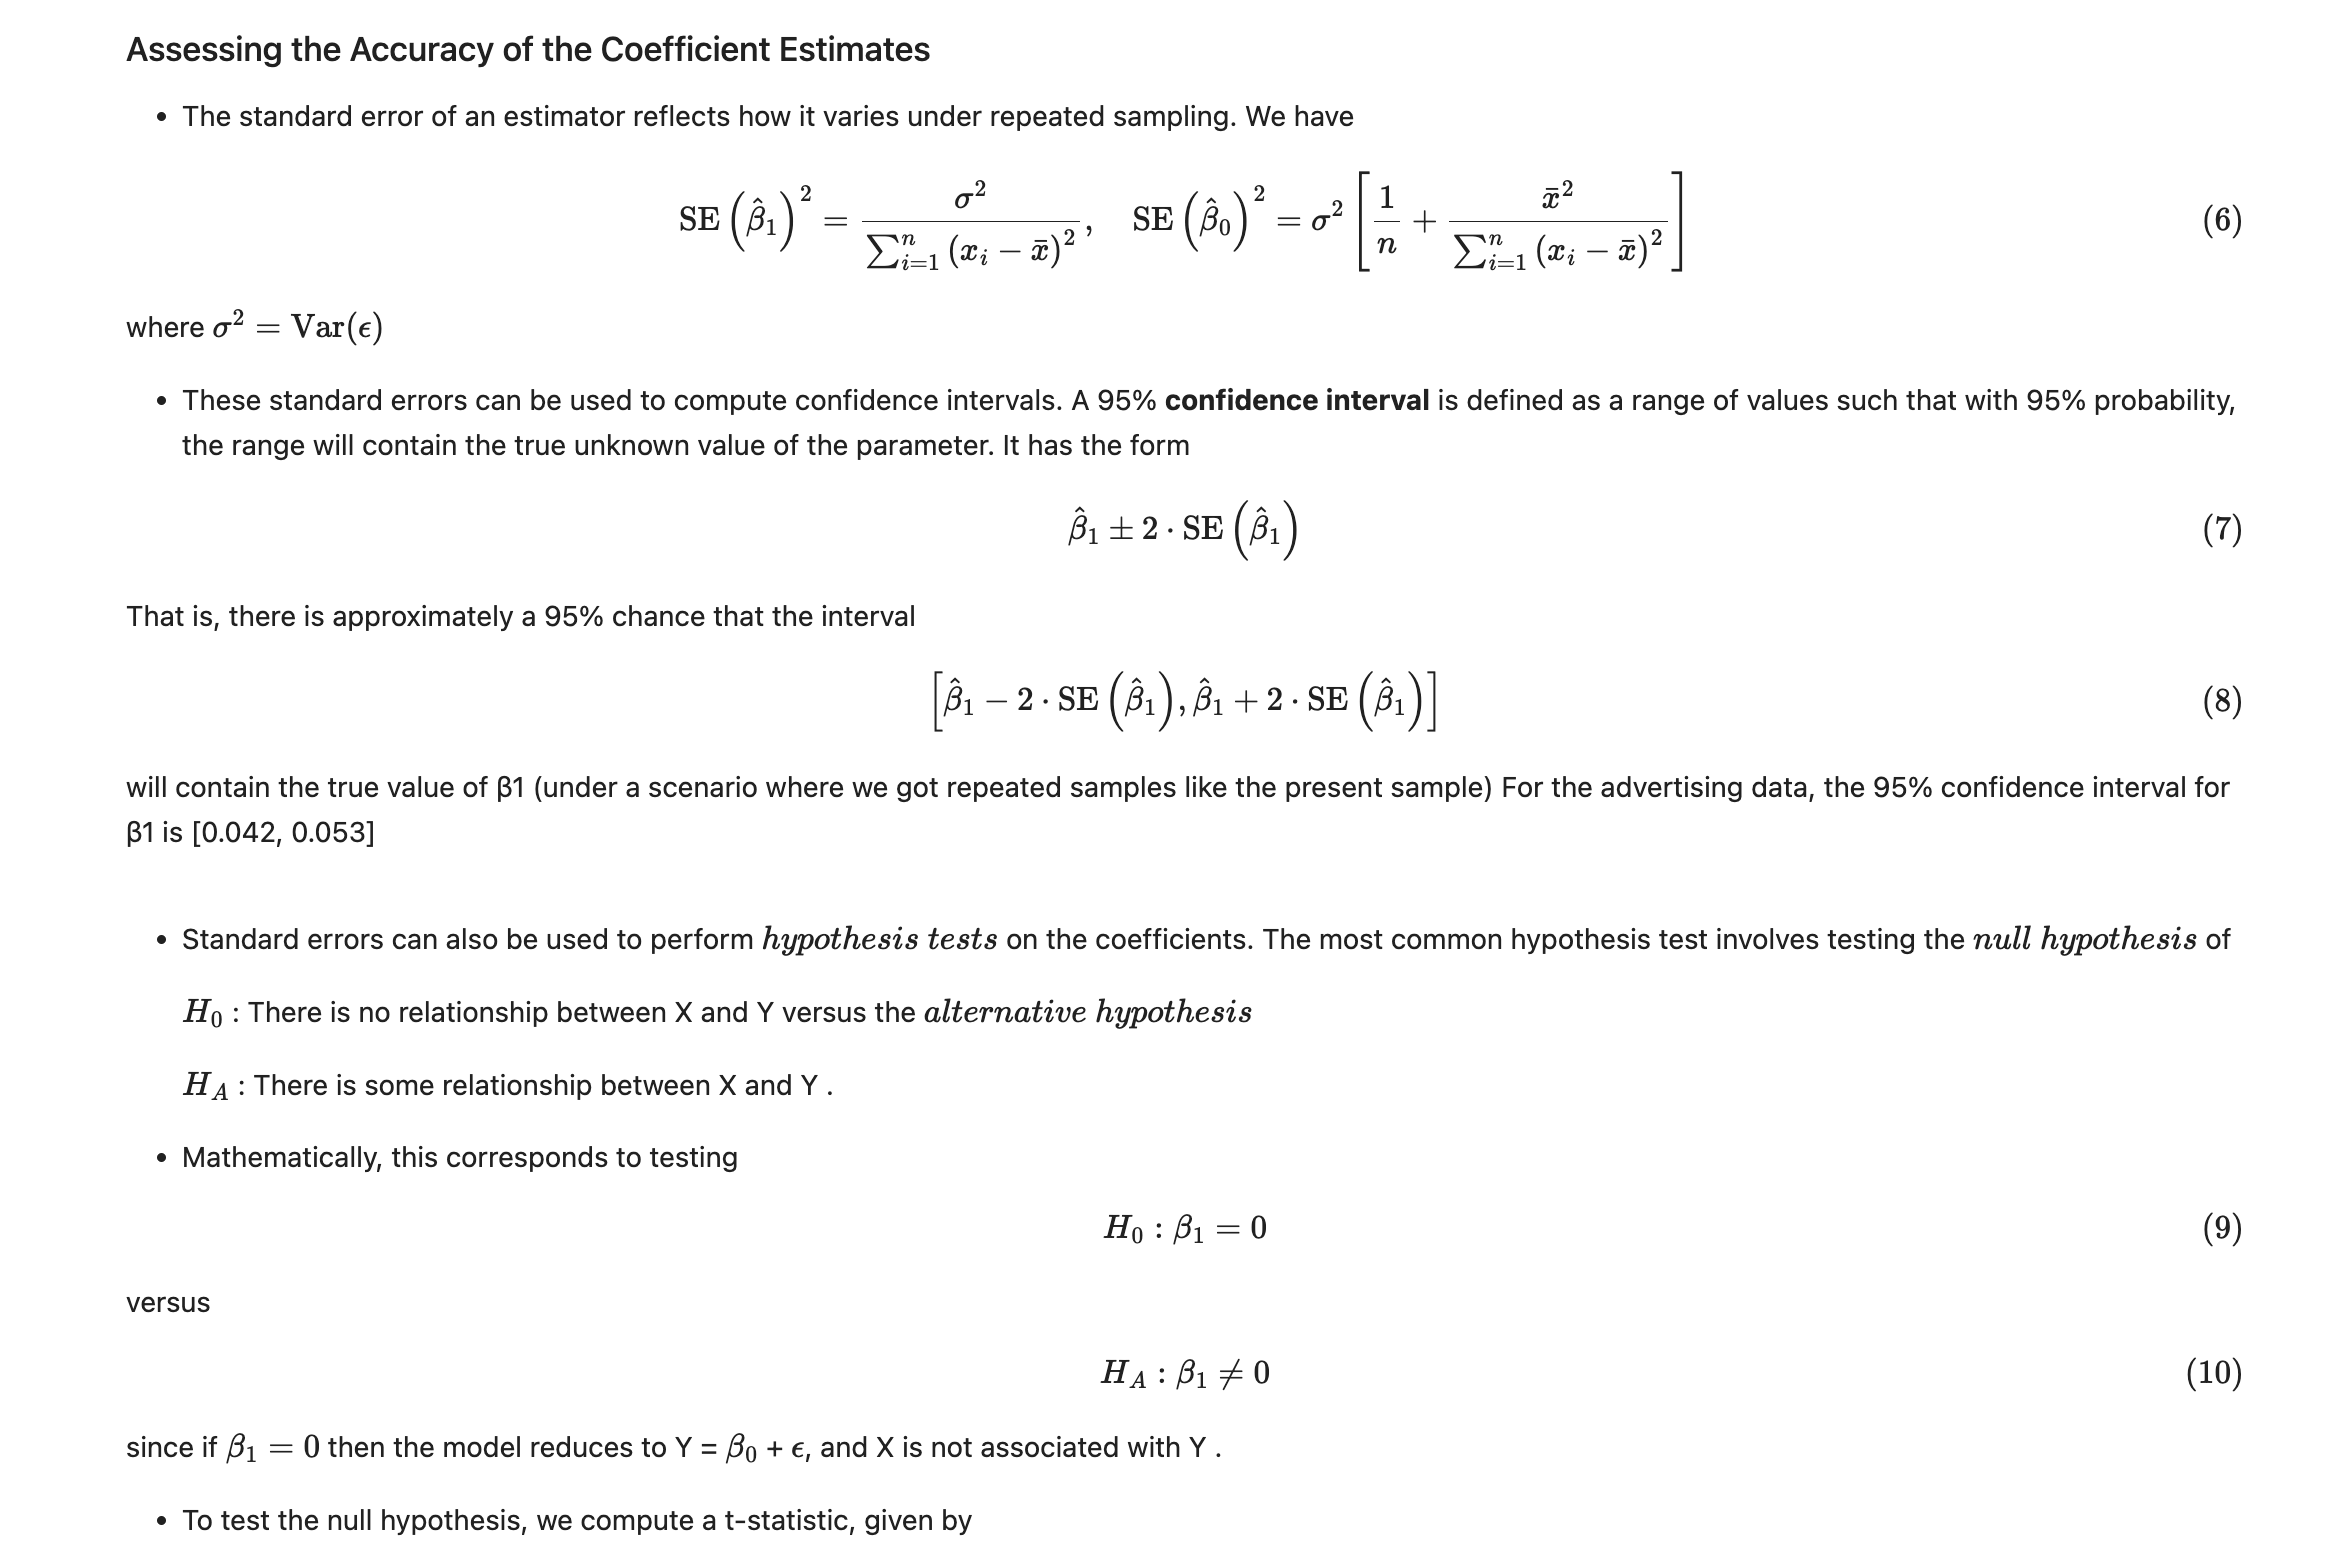

**Looking at some key statistics from the summary:**

The values we are concerned with are -

1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

**1. The coefficient for TV is 0.054, with a very low p value**
The coefficient is statistically significant. So the association is not purely by chance.

**2. R - squared is 0.816**
Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

###**Conclusion**

The F statistic is 312.14, with a very low p value

The F statistic is a measure of the overall significance of the regression model. The very low p value indicates that the model is statistically significant and that the association between TV and Sales is not likely to be due to chance.

Overall, the statistics indicate that there is a strong and statistically significant association between TV advertising and Sales. The coefficient for TV indicates that for every unit increase in TV advertising, there is a corresponding 0.054 unit increase in Sales, on average. The high R-squared value indicates that TV advertising explains a significant portion of the variability in Sales. The low p value for the F statistic suggests that the model is highly significant overall, providing further evidence of the strength of the association between TV advertising and Sales.

How well does the model fit the data?

the model fit is statistically significant, and the explained variance isn't purely by chance.

Ans: The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

Sales=6.948+0.054×TV

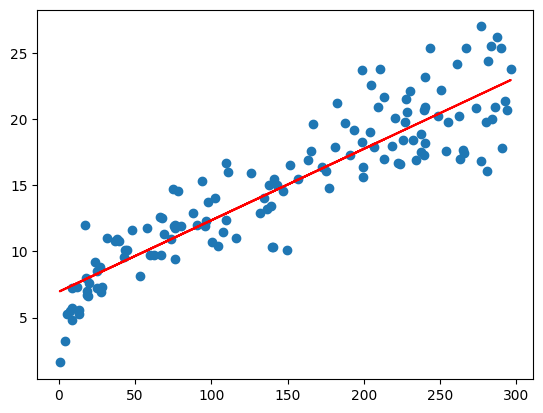

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

##Model Evaluation

**Residual analysis**

To validate assumptions of the model, and hence the reliability for inference

**Distribution of the error terms**
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

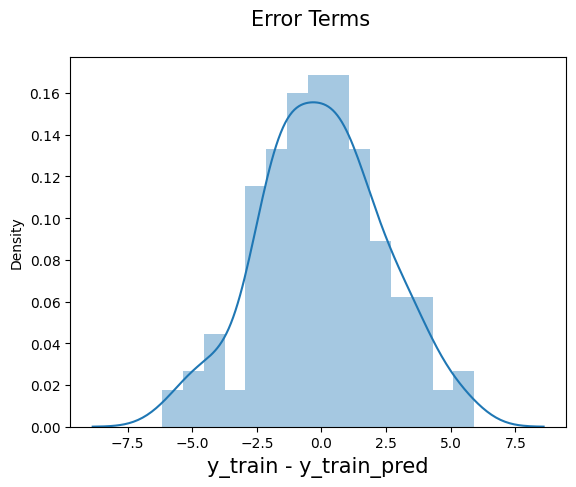

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

Looking for patterns in the residuals

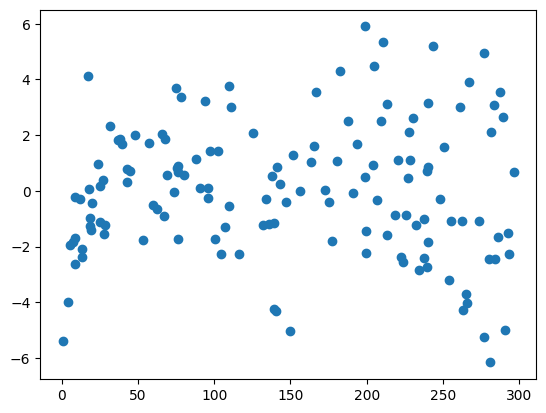

In [ ]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. 

The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

**Predictions on the Test Set**

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. 

For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

**Looking at the RMSE**

In [ ]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

**Checking the R-squared on the test set**

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

**Visualizing the fit on the test set**

###**How well does the model fit the data?**

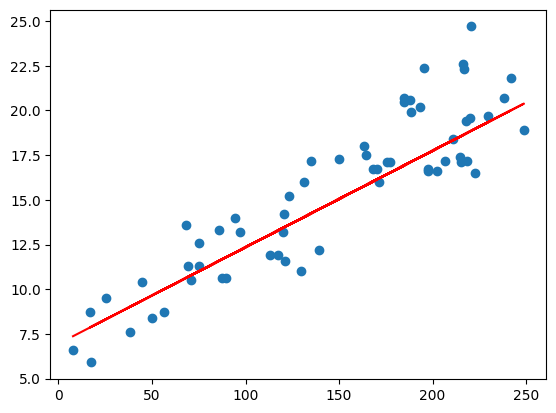

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

From the above plot we can see how well the model is able to predict the actual values of y_test

##Conclusion

The linear regression model has a positive slope (0.054), that is, there is a positive correlation between X_test and y_test. In other words, as the value of X_test increases, we would expect the value of y_test to increase as well.

The intercept of the linear regression model is 6.948, which represents the predicted value of y_test when X_test is zero.

The scatter plot of the test data can help us assess the goodness-of-fit of the linear regression model. As we can see the scatter plot are clustered closely around the line plot, that would suggest that the model is a good fit for the data. 

References:

Sckit learn offcial documentation

Refered Towards Data Science

Eli5 official documentation

http://r-statistics.co/Assumptions-of-Linear-Regression.html

https://www.statisticssolutions.com/assumptions-of-linear-regression/

The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documnetation.

Copyright (C) <2022> Divya Myneni

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.